In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [2]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [3]:

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [4]:

original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 23s 410ms/step - loss: 0.4581 - acc: 0.8204 - val_loss: 0.3535 - val_acc: 0.8710
Epoch 2/20
49/49 [==============================] - 5s 103ms/step - loss: 0.2629 - acc: 0.9107 - val_loss: 0.2901 - val_acc: 0.8866
Epoch 3/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2054 - acc: 0.9275 - val_loss: 0.2861 - val_acc: 0.8864
Epoch 4/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1708 - acc: 0.9408 - val_loss: 0.2887 - val_acc: 0.8864
Epoch 5/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1460 - acc: 0.9492 - val_loss: 0.3062 - val_acc: 0.8811
Epoch 6/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1290 - acc: 0.9556 - val_loss: 0.3479 - val_acc: 0.8705
Epoch 7/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1131 - acc: 0.9622 - val_loss: 0.3542 - val_acc: 0.8723
Epoch 8/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1001 

In [5]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 28s 441ms/step - loss: 0.5961 - acc: 0.7072 - val_loss: 0.5439 - val_acc: 0.7563
Epoch 2/20
49/49 [==============================] - 2s 37ms/step - loss: 0.4985 - acc: 0.8284 - val_loss: 0.4934 - val_acc: 0.8315
Epoch 3/20
49/49 [==============================] - 2s 44ms/step - loss: 0.4437 - acc: 0.8807 - val_loss: 0.4532 - val_acc: 0.8420
Epoch 4/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3862 - acc: 0.9116 - val_loss: 0.4115 - val_acc: 0.8669
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3297 - acc: 0.9289 - val_loss: 0.3642 - val_acc: 0.8853
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2714 - acc: 0.9369 - val_loss: 0.3347 - val_acc: 0.8831
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2197 - acc: 0.9431 - val_loss: 0.3059 - val_acc: 0.8872
Epoch 8/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1818 -

In [6]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

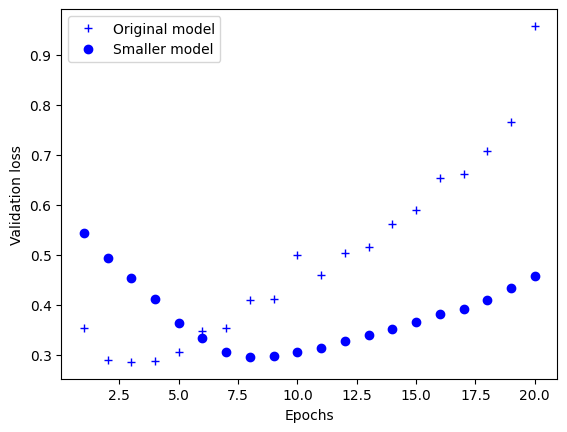

In [7]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [8]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [10]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))


Epoch 1/20
49/49 [==============================] - 34s 663ms/step - loss: 0.4485 - acc: 0.7982 - val_loss: 0.3043 - val_acc: 0.8754
Epoch 2/20
49/49 [==============================] - 11s 218ms/step - loss: 0.2207 - acc: 0.9135 - val_loss: 0.2838 - val_acc: 0.8840
Epoch 3/20
49/49 [==============================] - 10s 204ms/step - loss: 0.1319 - acc: 0.9506 - val_loss: 0.4646 - val_acc: 0.8431
Epoch 4/20
49/49 [==============================] - 9s 185ms/step - loss: 0.0765 - acc: 0.9746 - val_loss: 0.3203 - val_acc: 0.8817
Epoch 5/20
49/49 [==============================] - 9s 190ms/step - loss: 0.0161 - acc: 0.9960 - val_loss: 4.1048 - val_acc: 0.5883
Epoch 6/20
49/49 [==============================] - 10s 207ms/step - loss: 0.0598 - acc: 0.9908 - val_loss: 0.6302 - val_acc: 0.8804
Epoch 7/20
49/49 [==============================] - 9s 194ms/step - loss: 0.1018 - acc: 0.9886 - val_loss: 0.7762 - val_acc: 0.8403
Epoch 8/20
49/49 [==============================] - 10s 199ms/step - los

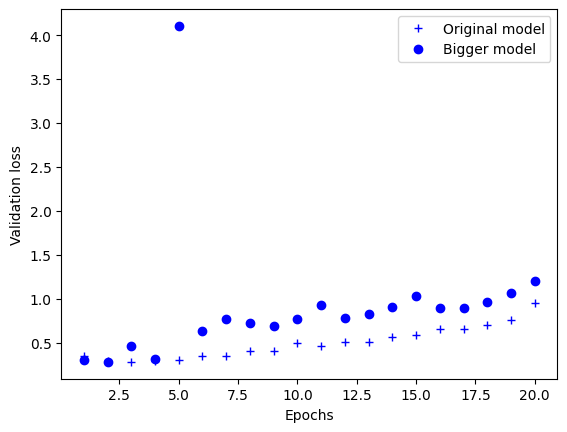

In [11]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

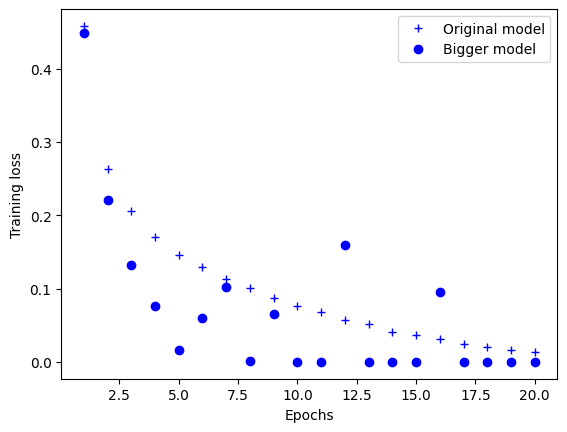

In [12]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

**Adding weight regularization**

In [13]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [15]:

l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 20s 385ms/step - loss: 0.5142 - acc: 0.8122 - val_loss: 0.4227 - val_acc: 0.8533
Epoch 2/20
49/49 [==============================] - 2s 32ms/step - loss: 0.3275 - acc: 0.9010 - val_loss: 0.3373 - val_acc: 0.8892
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2780 - acc: 0.9175 - val_loss: 0.3345 - val_acc: 0.8868
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2547 - acc: 0.9258 - val_loss: 0.3535 - val_acc: 0.8762
Epoch 5/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2418 - acc: 0.9322 - val_loss: 0.3538 - val_acc: 0.8784
Epoch 6/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2311 - acc: 0.9371 - val_loss: 0.3444 - val_acc: 0.8839
Epoch 7/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2245 - acc: 0.9388 - val_loss: 0.3811 - val_acc: 0.8705
Epoch 8/20
49/49 [==============================] - 2s 31ms/step - loss: 0.2162 -

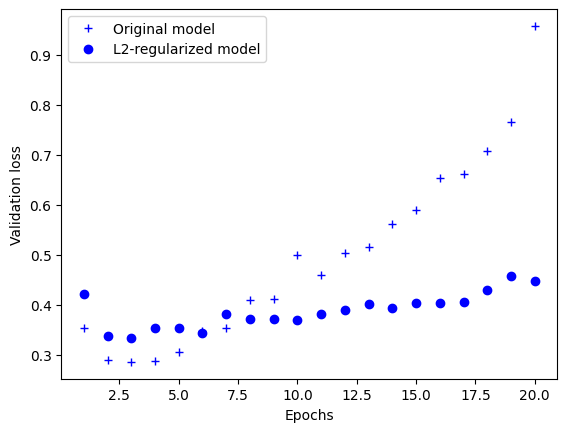

In [16]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [17]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

**Adding dropout**

In [18]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [19]:

dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 21s 400ms/step - loss: 0.5864 - acc: 0.6865 - val_loss: 0.4269 - val_acc: 0.8668
Epoch 2/20
49/49 [==============================] - 2s 32ms/step - loss: 0.4356 - acc: 0.8129 - val_loss: 0.3283 - val_acc: 0.8832
Epoch 3/20
49/49 [==============================] - 1s 28ms/step - loss: 0.3493 - acc: 0.8661 - val_loss: 0.2876 - val_acc: 0.8869
Epoch 4/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2984 - acc: 0.8919 - val_loss: 0.2865 - val_acc: 0.8835
Epoch 5/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2510 - acc: 0.9097 - val_loss: 0.2836 - val_acc: 0.8893
Epoch 6/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2300 - acc: 0.9238 - val_loss: 0.2928 - val_acc: 0.8875
Epoch 7/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2019 - acc: 0.9299 - val_loss: 0.3111 - val_acc: 0.8870
Epoch 8/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1814 -

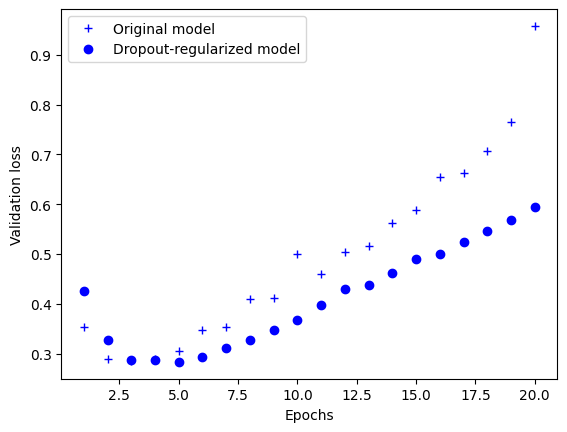

In [20]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Again, a clear improvement over the reference network.

To recap: here the most common ways to prevent overfitting in neural networks:

- Getting more training data.
- Reducing the capacity of the network.
- Adding weight regularization.
- Adding dropout.